Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', 30)

In [67]:
data=pd.read_csv('dataset.csv')
result=list(data['pktcount']/data['dur'])
data['pktCount/dur']=result
result=list(data['bytecount']/data['dur'])
data['byteCount/dur']=result

# Replacing infinite with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
data.dropna(inplace=True)

data.shape

(103507, 25)

In [68]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,pktCount/dur,byteCount/dur
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0,453.040000,482940.640000
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0,451.410714,481203.821429
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0,451.665000,481474.890000
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0,451.665000,481474.890000
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0,451.665000,481474.890000


In [69]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,pktCount/dur,byteCount/dur
count,103507.000000,103507.000000,103507.000000,1.035070e+05,103507.000000,1.035070e+05,1.035070e+05,103507.000000,103507.000000,103507.000000,1.035070e+05,103507.000000,103507.000000,103507.000000,1.035070e+05,1.035070e+05,103507.000000,103507.000000,103507.000000,103507.000000,103507.000000,103507.000000
mean,17997.346943,4.214652,52949.769842,3.813851e+07,323.159342,4.613735e+08,3.235481e+11,5.668631,5200.534292,6414.635744,4.729172e+06,213.306259,0.604181,2.337455,9.388806e+07,9.391601e+07,1004.058885,1004.098428,2008.157313,0.389375,252.017792,188156.047010
std,11963.141732,1.957204,52060.047726,4.877646e+07,283.793460,2.768589e+08,2.836776e+11,2.951304,5268.963828,7187.717686,7.367902e+06,239.622206,0.489028,1.082924,1.522918e+08,1.332648e+08,2428.584644,2054.970744,3144.913299,0.487611,188.222092,205067.884489
min,2488.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,1.024000e+09,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7128.000000,3.000000,810.000000,7.947800e+04,129.000000,2.340000e+08,1.300000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.812000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000,0.977528,95.797753
50%,11965.000000,4.000000,42895.000000,6.443094e+06,252.000000,4.180000e+08,2.530000e+11,5.000000,3024.000000,8314.000000,5.478100e+05,277.000000,1.000000,2.000000,4.609657e+06,1.421994e+07,0.000000,0.000000,4.000000,0.000000,298.455556,29671.707809
75%,29982.000000,5.000000,94814.000000,7.600244e+07,413.000000,7.020000e+08,4.130000e+11,7.000000,7385.000000,10015.000000,9.727070e+06,333.000000,1.000000,3.000000,1.356555e+08,1.439286e+08,255.000000,557.000000,3838.000000,1.000000,434.847403,352350.357675
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000,2383.000000,673712.000000


In [70]:
# 0-Benign  1-Malicious
data.label.value_counts()

0    63204
1    40303
Name: label, dtype: int64

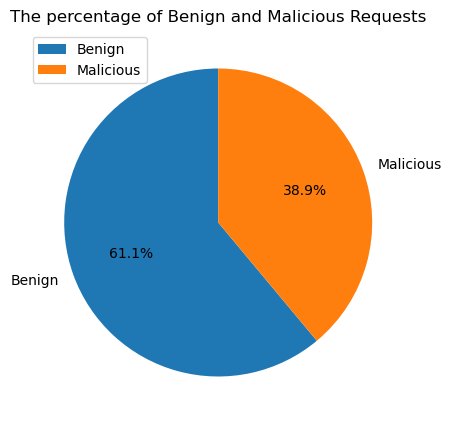

In [71]:
labels = ["Benign",'Malicious']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plot.figure(figsize = (5,5))
plot.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plot.legend(["Benign","Malicious"])
plot.title('The percentage of Benign and Malicious Requests')
plot.show()

Text(0.5, 1.0, 'Number of requests from different IP address')

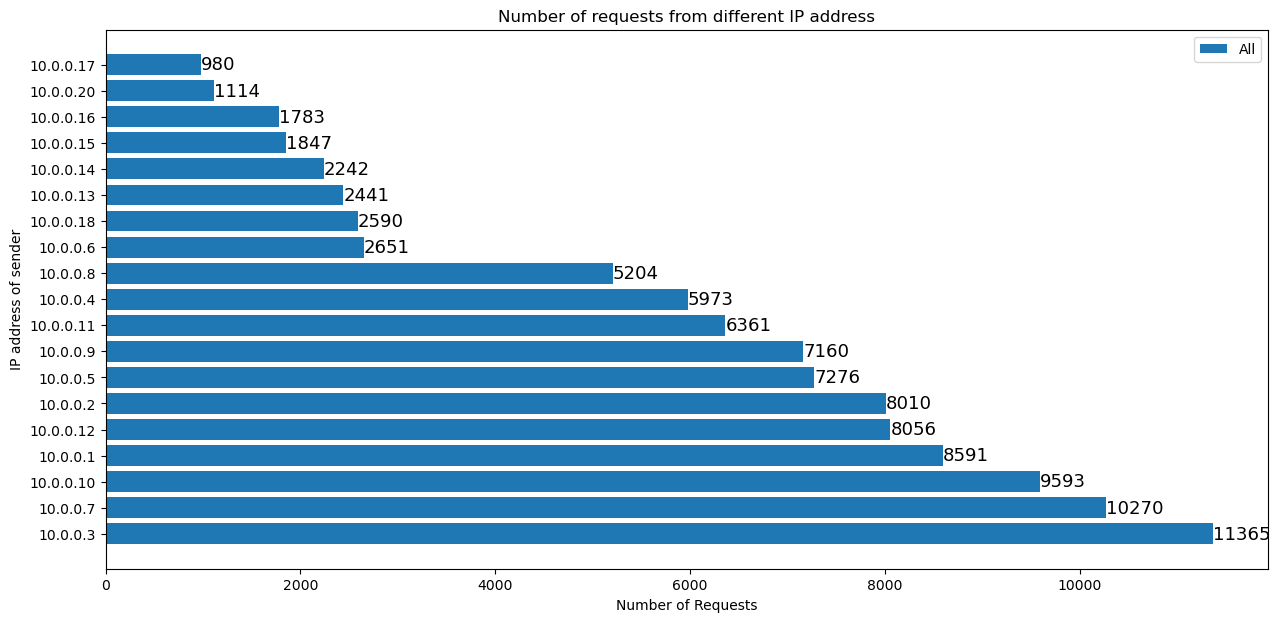

In [72]:
figure(figsize=(15, 7))
#for All
plot.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values())

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plot.text(x = val, y = idx-0.2, s = str(val), size = 13)

plot.xlabel('Number of Requests')
plot.ylabel('IP address of sender')
plot.legend(['All'])
plot.title('Number of requests from different IP address')

Text(0.5, 1.0, 'Number of Malicious requests from different IP address')

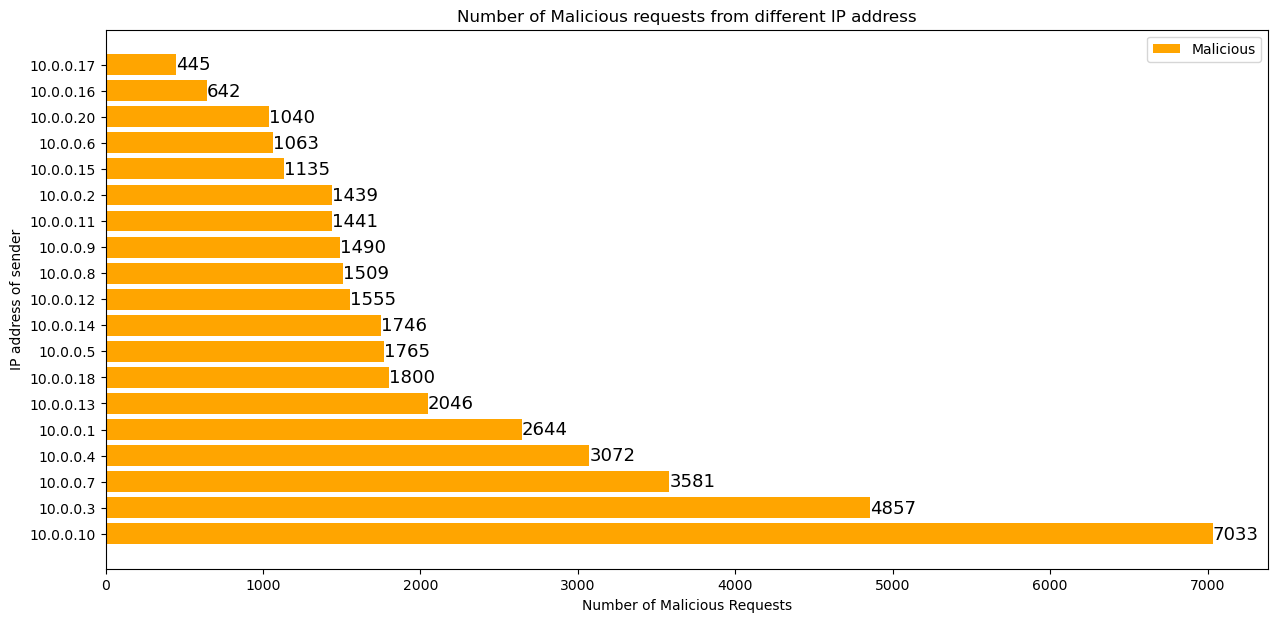

In [73]:
figure(figsize=(15, 7))
#for Malicious
plot.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='orange')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plot.text(x = val, y = idx-0.2, s = str(val), size = 13)

plot.xlabel('Number of Malicious Requests')
plot.ylabel('IP address of sender')
plot.legend(['Malicious'])
plot.title('Number of Malicious requests from different IP address')

In [74]:
df = data.copy()
df = df.dropna()
X = df.drop(['dt','src','dst','label'], axis=1)
y = df.label
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
M = LogisticRegression(solver='liblinear')
M.fit(X_train, y_train)
joblib.dump(M, 'logisticr.joblib')
prediction = M.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71     19066
           1       0.50      0.40      0.45     11987

    accuracy                           0.62     31053
   macro avg       0.58      0.58      0.58     31053
weighted avg       0.60      0.62      0.61     31053



In [76]:
W = RandomForestClassifier()
W.fit(X_train, y_train)
joblib.dump(W, 'randomf.joblib')
prediction = W.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19066
           1       1.00      1.00      1.00     11987

    accuracy                           1.00     31053
   macro avg       1.00      1.00      1.00     31053
weighted avg       1.00      1.00      1.00     31053



In [77]:
Z = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=11)
Z.fit(X_train, y_train)
joblib.dump(Z, 'decisiont.joblib')
prediction = Z.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     19066
           1       0.96      1.00      0.98     11987

    accuracy                           0.98     31053
   macro avg       0.98      0.98      0.98     31053
weighted avg       0.98      0.98      0.98     31053



In [78]:
A = GaussianNB()
A.fit(X_train, y_train)
joblib.dump(A, 'naiveb.joblib')
prediction = A.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      0.82      0.73     19066
           1       0.54      0.35      0.42     11987

    accuracy                           0.63     31053
   macro avg       0.60      0.58      0.58     31053
weighted avg       0.62      0.63      0.61     31053

